# FE542 Homework 4

## Problem 1

### The conditional log likelihood function of AR(1)-GARCH(1,1) model

$$Conditional Log Likelihood = log\{ f_{r_1}(\Theta) \cdot \prod_{t=2}^{n} f_{r_t|r_{t-1},\sigma_{t-1},\epsilon_{t-1}} (\Theta) \}$$
where $\Theta = \{\phi_1,\alpha_0,\alpha_1,\beta_1\}$
Since the residual term $\epsilon$ is Gaussian, the whole distribution for $r_t$ is also Gaussian.

Here, we use this conclusion without prove (it's well-known and one can find in most statistics notebooks). The question is about how to derive the distribution or more specifically, the mean and variance of the Gaussian distribution along different terms. The good one is that here we use conditional likelihood function which means we are assumed to know the parameters in the history and do not care about the relation ship between all of them.

Lemma

* At time t, the conditional mean of return $r_t$ satisfies
$$\mu_t := E[r_t|\mathcal{F}_{t-1}] = \mu + \phi_1 r_{t-1}$$

* The conditional variance of return $r_t$
$$\sigma_t^2 := Var[r_t|\mathcal{F}_{t-1}] = \alpha_0 + \alpha_1 \sigma_{t-1}^2 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2$$

* Long-term mean
$$(1-\phi_1)\mu_{\infty} = \mu\\
    \mu_{\infty} = \frac{\mu}{1-\phi_1}$$
    
* Long-term variance
$$\sigma_{\infty}(1-\alpha_1-\beta_1)=\alpha_0\\
\sigma_{\infty} = \frac{\alpha_0}{1-\alpha_1-\beta_1}$$

* Likelihood function for Normal distribution $N(\mu_t,\sigma_t^2)$
$$\frac{1}{2\pi \sigma_t^2} \exp(-\frac{(r_t - \mu_t)^2}{2 \sigma_t^2})$$

* Conditional log likelihood function for $\{r_t\}_{t=1,2,\cdots,n}$
$$log\{ f_{r_1}(\Theta)\} + \sum_{t=2}^n log\{f_{r_t|r_{t-1},\sigma_{t-1},\epsilon_{t-1}} (\Theta) \}$$

$$= -\frac{1}{2} \sum_{t=1}^n log 2\pi \sigma_t^2 - \sum_{t=1}^n \frac{(r_t-\mu_t)^2}{2\sigma_t^2}$$
where
$$\mu_t := E[r_t|\mathcal{F}_{t-1}] = \mu + \phi_1 r_{t-1}, t=2,3,\cdots, n$$
$$\sigma_t^2 := Var[r_t|\mathcal{F}_{t-1}] = \alpha_0 + \alpha_1 \sigma_{t-1}^2 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2, t=2,3,\cdots, n$$
$$\mu_1 = \mu_{\infty} = \frac{\mu}{1-\phi_1}$$
$$\sigma_1 = sigma_{\infty}=\frac{\alpha_0}{1-\alpha_1-\beta_1}$$

Note that in the above derivatives, we used long-term moments to match the statistics in time equals 1. This is because we do not know the information before $t=1$. As a result, we should find an estimated distribution to these parameters, a "no-harm" strategy is using the long-term ones.

## Problem2
### Given generated data from an ARMA(p,q) model, can I create data from an ARIMA (p,1,q) model? How?

>Sure, for example, we have the data from ARMA(p,q) named arma_sim. Then, arima_sim = cumsum(arma_sim)

In [1]:
import statsmodels.api as sm
import numpy as np
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar,ma)
print(arma_process.isstationary) # check stationarity
print(arma_process.isinvertible) # check invertibility
arma_sim = arma_process.generate_sample(1000)
arima_sim = np.cumsum(arma_sim)
model = sm.tsa.ARIMA(arima_sim,(2,1,2)).fit(trend='nc', disp=0)
model.params


/Users/xiayuxuan/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


True
True


/Users/xiayuxuan/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/xiayuxuan/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


array([ 0.70182152, -0.23570321,  0.69743013,  0.3855389 ])

>The calibrated parameters are consistent! Verified our assersion

### (a) For the ARMA parameters, choose $\mu, \phi_1, \phi_2, \theta_1, \theta_2$ so that the model is stationary and invertible. We will use these parameters in the following parts.

In [2]:
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar,ma)
print(arma_process.isstationary) # check stationarity
print(arma_process.isinvertible) # check invertibility
y = arma_process.generate_sample(250)
model = sm.tsa.ARMA(y, (2, 2)).fit(trend='nc', disp=0) # calibrate the exact model
model.params

True
True


/Users/xiayuxuan/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/xiayuxuan/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


array([ 0.79044201, -0.2314064 ,  0.70072905,  0.40608023])

### (b) Generate three time series for the ARIMA(2,2,2) for each of the following values of $\sigma_a$: 0.8, 0.1, and 0.01. Generate 1,008 observations for each value of the $\sigma_a$. That is, for each different $\sigma_a$ value, generate a different time series yt (all three of them with the same size - 4 years). Create an ACF plot for each data thus created.

>#### Claim: there is no generator function for ARIMA process in python, so I just used the property made by the above and used an ARMA generator to simulate ARIMA processes

In [3]:
arma_process = sm.tsa.ArmaProcess(ar,ma)

arma_sim1 = arma_process.generate_sample(1008,0.8)
arima_sim1 = np.cumsum(np.cumsum(arma_sim)) # I=2 --> double cumsum

arma_sim2 = arma_process.generate_sample(1008,0.1)
arima_sim2 = np.cumsum(np.cumsum(arma_sim)) # I=2 --> double cumsum

arma_sim3 = arma_process.generate_sample(1008,0.01)
arima_sim3 = np.cumsum(np.cumsum(arma_sim)) # I=2 --> double cumsum

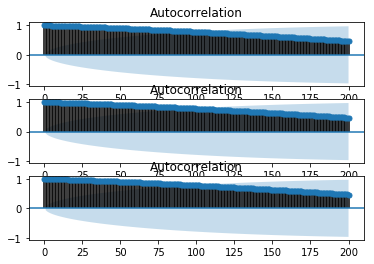

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,1)
plot_acf(arima_sim1,ax=axes[0],lags=200)
plot_acf(arima_sim2,ax=axes[1],lags=200)
plot_acf(arima_sim3,ax=axes[2],lags=200)
plt.show()

### (c) Test for unit root in these series. If there is a unit root, take the first difference $\Delta_t = (1 - L)y_t$, plot the ACF and retest. Again, continue with $\Delta_t^2 = (1 - L)^2y_t$, plot the ACF and retest. What do you observe? Comment.

>Here, we take arima_sim1 as an example

In [5]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag,nobs,criticals,icbest = adfuller(arima_sim1,maxlag=20,regression='nc')
pvalue

0.8436429138045936

>The null hypothesis(there is a unit root) is not rejected

In [6]:
arima_sim1_diff1 = np.diff(arima_sim1)
adf,pvalue,usedlag,nobs,criticals,icbest = adfuller(arima_sim1_diff1,maxlag=20,regression='nc')
pvalue

0.059273316991860926

>The same, still has a unit-root

In [7]:
arima_sim1_diff2 = np.diff(arima_sim1,n=2)
adf,pvalue,usedlag,nobs,criticals,icbest = adfuller(arima_sim1_diff2,maxlag=20,regression='nc')
pvalue

1.4750925363624437e-19

>Not surprised, there is no unit-root after twice first difference operation. That is because what we got here is actually a arma model without iteration term

## Problem3
### Download a daily time series of an equity of your choice containing data for the past 4 years. Let St denote the time series of daily stock values. Test for unit root in this time series. If there is one, remove it by taking continuously compounded returns (log first then difference). Do so until there are no more unit roots and then fit an ARMA model. Write down the final model and comment.

In [8]:
import pandas as pd
ftse100_df = pd.read_csv("FTSE 100 Historical Data.csv")

In [9]:
ftse100_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 20, 2018","7,368.17","7,328.92","7,368.17","7,323.31",792.27M,0.54%
1,"Apr 19, 2018","7,328.92","7,317.34","7,340.73","7,309.42",811.86M,0.16%
2,"Apr 18, 2018","7,317.34","7,226.05","7,325.59","7,226.05",904.18M,1.26%
3,"Apr 17, 2018","7,226.05","7,198.20","7,240.41","7,189.85",735.88M,0.39%
4,"Apr 16, 2018","7,198.20","7,264.56","7,265.83","7,195.46",889.30M,-0.91%


In [10]:
ftse100_price = np.array([float(istr.replace(",","")) for istr in ftse100_df['Price'].values][::-1])
print(ftse100_price)

[6039.9  6185.6  6198.1  ... 7317.34 7328.92 7368.17]


In [11]:
adf,pvalue,usedlag,nobs,criticals,icbest = adfuller(ftse100_price,maxlag=20,regression='nc')
pvalue

0.7216847435421199

In [12]:
ftse100_price_log1 = np.log(ftse100_price[1:]/ftse100_price[:-1])
adf,pvalue,usedlag,nobs,criticals,icbest = adfuller(ftse100_price_log1,maxlag=20,regression='nc')
pvalue

0.0

> No unit-root for log returns

In [13]:
ftse100_price_diff1 = np.diff(ftse100_price)
adf,pvalue,usedlag,nobs,criticals,icbest = adfuller(ftse100_price_diff1,maxlag=20,regression='nc')
pvalue

0.0

> No unit-root for first difference of prices

## Problem 4
### Download a daily time series of your choice for the past 4 years (it may be the same as the one in the previous problem). Model the returns as an ARIMA or an ARMA time series, using the modeling methods you have implemented in past assignments. Obtain the residuals and test for ARCH effects. If the effects are not present then download and test another equity. Repeat for as long as necessary to obtain an appropriate time series.

In [14]:
ftse100_price_log1[:10]

array([ 0.02383655,  0.00201878, -0.00785575, -0.01005099, -0.00452724,
        0.00891961,  0.00824082,  0.00077822, -0.01420015,  0.01858254])

>Since there is no unit-root effect, we use ARMA(2,2) model here.

In [15]:
fit_model = sm.tsa.ARMA(endog=ftse100_price_log1,order=(2,2)).fit()

/Users/xiayuxuan/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/xiayuxuan/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/xiayuxuan/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/Users/xiayuxuan/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


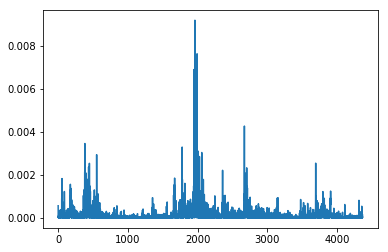

In [16]:
plt.plot(fit_model.resid**2)
plt.show()

In [17]:
from statsmodels.stats.diagnostic import acorr_ljungbox
statistics,pvalues = acorr_ljungbox(fit_model.resid**2)
print(pvalues)

[2.43710946e-058 1.90143530e-150 3.26648062e-253 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]


>The null hypothesis (autocorrelations are all zero) is rejected. Obviously, there is an ARCH effect in the residuels

### (a) Specify an ARCH model for the data, using the tools learned in class to determine the order. Write down the final model and its parameters (do not forget to re-estimate the ARIMA parameters as well for the specific ARCH order chosen).

> The original intention of the GARCH (ARCH) model is to explain excessive randomness in form of the volatility parameter. Since MA part for mean(return) equation introduces untrackable randomness, it is not that meaningful to add if we are using GARCH model (i.e. it can be integrated to the volatility term). As the following, we only choose our mean model to be an AR model. In python there is no auto-tool to learn the order (Neither should we, because you can't say it just from some wierd criterion). Again, we choose AR(2) model

-26325.052233001978


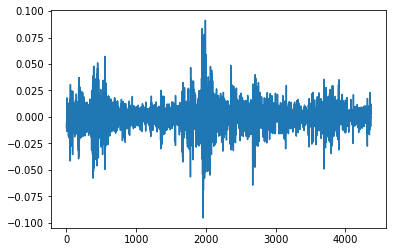

                     AR - Constant Variance Model Results                     
Dep. Variable:                      y   R-squared:                       0.004
Mean Model:                        AR   Adj. R-squared:                  0.003
Vol Model:          Constant Variance   Log-Likelihood:                13179.3
Distribution:                  Normal   AIC:                          -26350.6
Method:            Maximum Likelihood   BIC:                          -26325.1
                                        No. Observations:                 4366
Date:                Mon, Apr 30 2018   Df Residuals:                     4362
Time:                        23:25:37   Df Model:                            4
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      4.3149e-05  1.793e-04      0.241      0.810 

In [18]:
from arch.univariate import ARX
ar = ARX(ftse100_price_log1,lags=2)
res = ar.fit()
print(res.bic)
plt.plot(res.resid)
plt.show()
print(res.summary())

In [19]:
resid = res.resid[~np.isnan(res.resid)]

In [20]:
acorr_ljungbox(resid**2)

(array([ 247.92312743,  647.39089512, 1082.13263817, 1460.49021769,
        1950.34725009, 2184.60381309, 2367.80425133, 2548.44524985,
        2825.36515045, 3142.81656195, 3319.76049606, 3524.92558258,
        3800.07720656, 3915.20779062, 4182.0254831 , 4340.4479257 ,
        4518.04458159, 4766.41536013, 4966.91297414, 5034.32736497,
        5196.23476859, 5289.31399958, 5454.3997599 , 5528.10365155,
        5647.85297496, 5729.65932506, 5827.35195242, 6105.81833901,
        6151.56814107, 6261.03051905, 6421.27081726, 6500.6612332 ,
        6589.21530913, 6665.57152196, 6780.96853636, 6827.20932521,
        6892.42069468, 6935.89771693, 6956.98613584, 7053.69618065]),
 array([7.36586990e-056, 2.63544105e-141, 2.73756452e-234, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.0000

>Still has ARCH effect

In [21]:
from arch.univariate import ARCH,GARCH
ar.volatility=ARCH(p=1)
res = ar.fit()
print(res.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: -13479.224224291649
Iteration:      2,   Func. Count:     22,   Neg. LLF: -13480.324609204232
Iteration:      3,   Func. Count:     36,   Neg. LLF: -13480.325512626798
Iteration:      4,   Func. Count:     50,   Neg. LLF: -13480.330066924964
Iteration:      5,   Func. Count:     63,   Neg. LLF: -13480.470861136206
Iteration:      6,   Func. Count:     75,   Neg. LLF: -13481.357907632355
Iteration:      7,   Func. Count:     90,   Neg. LLF: -13483.393922843707
Iteration:      8,   Func. Count:    105,   Neg. LLF: -13485.281809459133
Iteration:      9,   Func. Count:    116,   Neg. LLF: -13485.700787341962
Iteration:     10,   Func. Count:    131,   Neg. LLF: -13486.310566598855
Iteration:     11,   Func. Count:    145,   Neg. LLF: -13486.310893549344
Iteration:     12,   Func. Count:    159,   Neg. LLF: -13486.312656805814
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -13486.312655500271
 

In [22]:
print(res.params)

Const       0.000267
y[1]       -0.048302
y[2]       -0.005507
omega       0.000084
alpha[1]    0.400070
Name: params, dtype: float64


### (b) Construct a GARCH(1,1) for the ARIMA part of the model. Use each of the three options for the error distribution (gaussian, student-t, and generalized error distribution). Put the estimated coefficients from each model in a table and comment on the differences due to the choice of distribution.

In [23]:
ar.volatility = GARCH(p=1,q=1)
res = ar.fit()
print(res.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: -14116.654893946437
Iteration:      2,   Func. Count:     25,   Neg. LLF: -14120.567179481779
Iteration:      3,   Func. Count:     43,   Neg. LLF: -13512.034271459164
Iteration:      4,   Func. Count:     61,   Neg. LLF: 4180.134050515695
Iteration:      5,   Func. Count:     74,   Neg. LLF: -5059.986957785566
Iteration:      6,   Func. Count:     90,   Neg. LLF: -8594.955794273834
Iteration:      7,   Func. Count:    108,   Neg. LLF: -10580.920554321152
Iteration:      8,   Func. Count:    126,   Neg. LLF: -5883.285684102729
Iteration:      9,   Func. Count:    143,   Neg. LLF: -14119.834976195438
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -14119.834997239232
            Iterations: 13
            Function evaluations: 143
            Gradient evaluations: 9
                           AR - GARCH Model Results                           
Dep. Variable:                      y  

/Users/xiayuxuan/anaconda/envs/py36/lib/python3.6/site-packages/arch/univariate/base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [24]:
residuals = res.resid[~np.isnan(res.resid)]


In [25]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats

y = residuals
norm_params = scipy.stats.norm.fit(y)
t_params = scipy.stats.t.fit(y)
gennorm_params = scipy.stats.gennorm.fit(y)

print("normal:",norm_params)
print("student-t:",t_params)
print("generalized error:",gennorm_params)

normal: (-0.00017843683307068714, 0.011824842516345913)
student-t: (3.0067760939366908, -7.878879273285819e-05, 0.007420455659445923)
generalized error: (0.96623723708787, 0.0002606218645515399, 0.0076847552163144435)


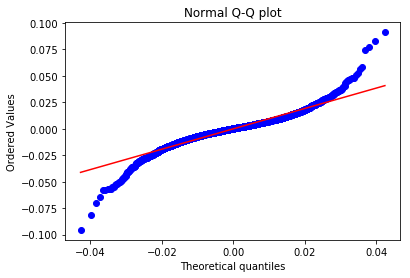

In [26]:
from scipy.stats import probplot
probplot(y,dist=scipy.stats.norm,sparams=norm_params,fit=False,plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

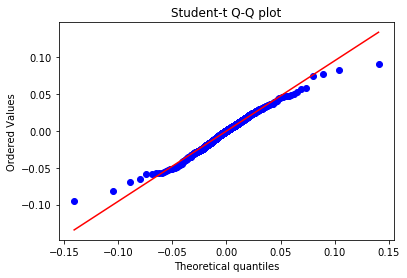

In [27]:
probplot(y,dist=scipy.stats.t,sparams=t_params,fit=False,plot=plt)
plt.title("Student-t Q-Q plot")
plt.show()

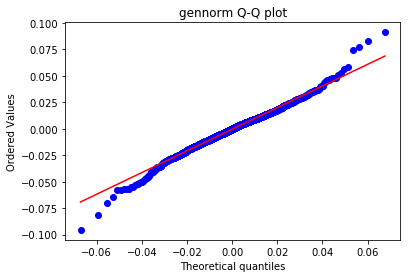

In [28]:
probplot(y,dist=scipy.stats.gennorm,sparams=gennorm_params,fit=False,plot=plt)
plt.title("gennorm Q-Q plot")
plt.show()

> From the qq plot we can see, Normal distribution does not fit well. The data is heavy-tailed. In this point, generalized error and student-t fits better.

### (c) Using the Normal errors formula, build an iterative equation for predicting the variances.

For GARCH(1,1) model
$$\sigma_t^2 = \omega + \alpha_1 \sigma_{t-1}^2 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2$$
Expect both sides
$$E[\sigma_t^2|\mathcal{F}_{t-1}] = \omega + \alpha_1 \sigma_{t-1}^2 E[\epsilon_{t-1}^2|\mathcal{F}_{t-1}] + \beta_1 \sigma_{t-1}^2$$

$$E[\sigma_t^2|\mathcal{F}_{t-1}] = \omega + (\alpha_1+\beta_1) \sigma_{t-1}^2$$

### (d) Figure a way to obtain the last $a_h$ and the last $\sigma_h$ from the output.

In [29]:
print("daily sigma h",res.conditional_volatility[-1])
print("daily residual h",res.resid[-1])
print("annualized sigma h",res.conditional_volatility[-1]*np.sqrt(252))

daily sigma h 0.008556686632708931
daily residual h 0.005695822703345882
annualized sigma h 0.13583318926115107


### (e) Using the numbers from the previous part and the iterative formula found earlier, calculate the next 15 predicted volatility values.

>In (c), we derived the variance estimation iterative formula. Without a sophisticated consideration, we use the square root of this estimation to estimate volatility (techniqually, it's wrong because volatility's distribution is not Gaussian anymore, and we should not assume the moment of this random variable happen to be the square root of the moment of variance. Naively, we do it in that way. Note that it is totally wrong!

In [30]:
res.params

Const       0.000221
y[1]       -0.041755
y[2]       -0.040627
omega       0.000003
alpha[1]    0.099998
beta[1]     0.879966
Name: params, dtype: float64

In [31]:
def pred_vol(omega,alpha,beta,vol,step):
    for i in range(step):
        vol = np.sqrt(omega+(alpha+beta)*vol**2)
        print("step: {},vol: {}".format(i+1,vol))
    pass

pred_vol(res.params['omega'],res.params['alpha[1]'],res.params['beta[1]'],res.conditional_volatility[-1],15)

step: 1,vol: 0.008634163953035172
step: 2,vol: 0.00870942030221267
step: 3,vol: 0.00878254321469625
step: 4,vol: 0.008853615142783055
step: 5,vol: 0.008922713870456015
step: 6,vol: 0.008989912883910968
step: 7,vol: 0.009055281704239134
step: 8,vol: 0.009118886186934355
step: 9,vol: 0.009180788792225267
step: 10,vol: 0.009241048829671911
step: 11,vol: 0.009299722679994639
step: 12,vol: 0.009356863996704793
step: 13,vol: 0.00941252388976892
step: 14,vol: 0.009466751093250883
step: 15,vol: 0.009519592118630862


### (f) Now use the predict function from the fGarch package. Write a paragraph comparing the values you obtained in the previous part with the outputted forecast.

In [32]:
forecasts = res.forecast(horizon = 15)
np.sqrt(forecasts.residual_variance[-1:])

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15
4367,0.008395,0.008477,0.008557,0.008634,0.008709,0.008783,0.008854,0.008923,0.00899,0.009055,0.009119,0.009181,0.009241,0.0093,0.009357


>Not suprised, quite similar but still different (see explaination in the beginning of (e)). To avoid this problem, we should calculate the square root Gaussian distribution first and than calculate the expectation of volatility